In [1]:
# linear regression
#supervised learning - try to find basic model y with all inputs --> form relationship


#process:

#get data
#exploratory data analysis = EDA
#clean data
#review model form
#split into train and test group
#run linear model


In [75]:
#read in phenotypic data spreadsheet
setwd("G:\\My Drive\\classes\\CS590 - Special Topics - R and Python Programming\\jcdunne.CS590")
student <- read.csv('student-mat.csv', sep = ';', header=TRUE)

Warning message in file(file, "rt"):
"cannot open file 'student-mat.csv': Invalid argument"

ERROR: Error in file(file, "rt"): cannot open the connection


In [76]:
summary(student)

 school   sex          age       address famsize   Pstatus      Medu      
 GP:349   F:208   Min.   :15.0   R: 88   GT3:281   A: 41   Min.   :0.000  
 MS: 46   M:187   1st Qu.:16.0   U:307   LE3:114   T:354   1st Qu.:2.000  
                  Median :17.0                             Median :3.000  
                  Mean   :16.7                             Mean   :2.749  
                  3rd Qu.:18.0                             3rd Qu.:4.000  
                  Max.   :22.0                             Max.   :4.000  
      Fedu             Mjob           Fjob            reason      guardian  
 Min.   :0.000   at_home : 59   at_home : 20   course    :145   father: 90  
 1st Qu.:2.000   health  : 34   health  : 18   home      :109   mother:273  
 Median :2.000   other   :141   other   :217   other     : 36   other : 32  
 Mean   :2.522   services:103   services:111   reputation:105               
 3rd Qu.:3.000   teacher : 58   teacher : 29                                
 Max.   :4.00

In [6]:
#clean data

any(is.na(student))

[1] FALSE

In [7]:
str(student)

'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [61]:
#EDA

library(ggplot2)
#library(ggthemes)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [13]:
head(student, 20)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [10]:
#grab only numeric columns

num.cols <- sapply(student, is.numeric)

In [11]:
num.cols

school        sex        age    address    famsize    Pstatus       Medu 
     FALSE      FALSE       TRUE      FALSE      FALSE      FALSE       TRUE 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
      TRUE      FALSE      FALSE      FALSE      FALSE       TRUE       TRUE 
  failures  schoolsup     famsup       paid activities    nursery     higher 
      TRUE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
     FALSE      FALSE       TRUE       TRUE       TRUE       TRUE       TRUE 
    health   absences         G1         G2         G3 
      TRUE       TRUE       TRUE       TRUE       TRUE

In [16]:
cor.data<- cor(student[,num.cols])
cor.data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000000,-0.163658419,-0.163438069,0.070640721,-0.004140037,0.24366538,0.053940096,0.01643439,0.126963880,0.131124605,0.11727605,-0.062187369,0.17523008,-0.06408150,-0.14347405,-0.16157944
Medu,-0.163658419,1.000000000,0.623455112,-0.171639305,0.064944137,-0.23667996,-0.003914458,0.03089087,0.064094438,0.019834099,-0.04712346,-0.046877829,0.10028482,0.20534100,0.21552717,0.21714750
Fedu,-0.163438069,0.623455112,1.000000000,-0.158194054,-0.009174639,-0.25040844,-0.001369727,-0.01284553,0.043104668,0.002386429,-0.01263102,0.014741537,0.02447289,0.19026994,0.16489339,0.15245694
traveltime,0.070640721,-0.171639305,-0.158194054,1.000000000,-0.100909119,0.09223875,-0.016807986,-0.01702494,0.028539674,0.138325309,0.13411575,0.007500606,-0.01294378,-0.09303999,-0.15319796,-0.11714205
studytime,-0.004140037,0.064944137,-0.009174639,-0.100909119,1.000000000,-0.17356303,0.039730704,-0.14319841,-0.063903675,-0.196019263,-0.25378473,-0.075615863,-0.06270018,0.16061192,0.13588000,0.09781969
failures,0.243665377,-0.236679963,-0.250408444,0.092238746,-0.173563031,1.00000000,-0.044336626,0.09198747,0.124560922,0.136046931,0.14196203,0.065827282,0.06372583,-0.35471761,-0.35589563,-0.36041494
famrel,0.053940096,-0.003914458,-0.001369727,-0.016807986,0.039730704,-0.04433663,1.000000000,0.15070144,0.064568411,-0.077594357,-0.11339731,0.094055728,-0.04435409,0.02216832,-0.01828135,0.05136343
freetime,0.016434389,0.030890867,-0.012845528,-0.017024944,-0.143198407,0.09198747,0.150701444,1.00000000,0.285018715,0.209000848,0.14782181,0.075733357,-0.05807792,0.01261293,-0.01377714,0.01130724
goout,0.126963880,0.064094438,0.043104668,0.028539674,-0.063903675,0.12456092,0.064568411,0.28501871,1.000000000,0.266993848,0.42038575,-0.009577254,0.04430222,-0.14910397,-0.16225003,-0.13279147
Dalc,0.131124605,0.019834099,0.002386429,0.138325309,-0.196019263,0.13604693,-0.077594357,0.20900085,0.266993848,1.000000000,0.64754423,0.077179582,0.11190803,-0.09415879,-0.06412018,-0.05466004


In [18]:
install.packages(c('corrplot', 'corrgram'))
library(corrplot)
library(corrgram)

Installing packages into 'C:/Users/Lauren Redpath/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'gridExtra', 'bitops', 'viridis', 'gtools', 'gdata', 'caTools', 'TSP', 'qap', 'gclus', 'dendextend', 'gplots', 'registry', 'seriation'



package 'gridExtra' successfully unpacked and MD5 sums checked
package 'bitops' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked and MD5 sums checked
package 'gtools' successfully unpacked and MD5 sums checked
package 'gdata' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked
package 'TSP' successfully unpacked and MD5 sums checked
package 'qap' successfully unpacked and MD5 sums checked
package 'gclus' successfully unpacked and MD5 sums checked
package 'dendextend' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked
package 'registry' successfully unpacked and MD5 sums checked
package 'seriation' successfully unpacked and MD5 sums checked
package 'corrplot' successfully unpacked and MD5 sums checked
package 'corrgram' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lauren Redpath\AppData\Local\Temp\RtmpIBw

corrplot 0.84 loaded
Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus


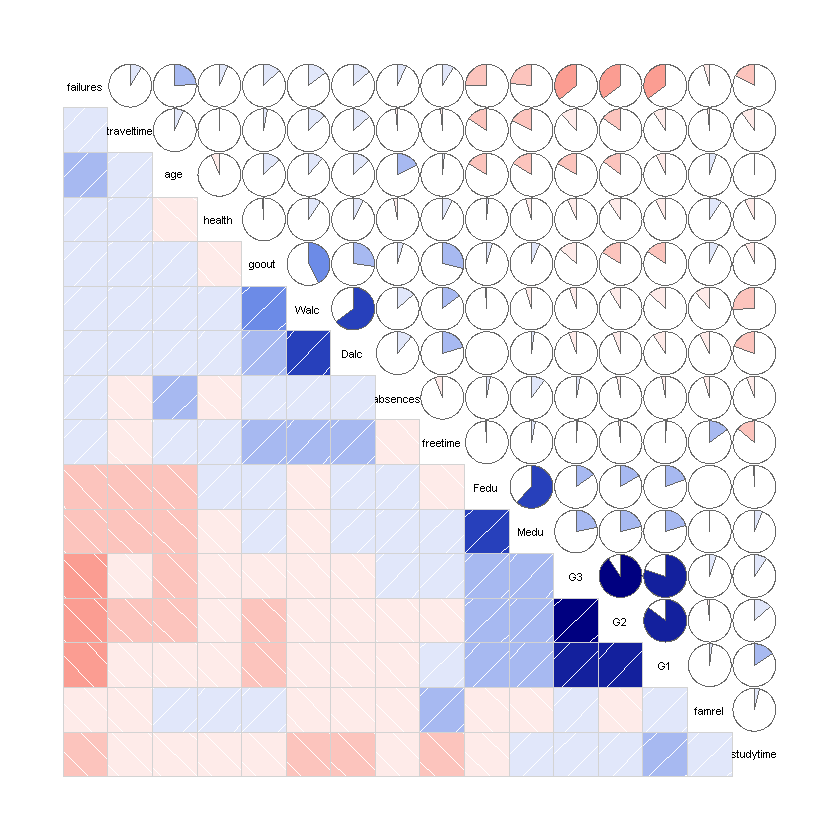

In [19]:
corrgram(student, order=TRUE, lower.panel=panel.shade, upper.panel=panel.pie,text.panel=panel.txt)

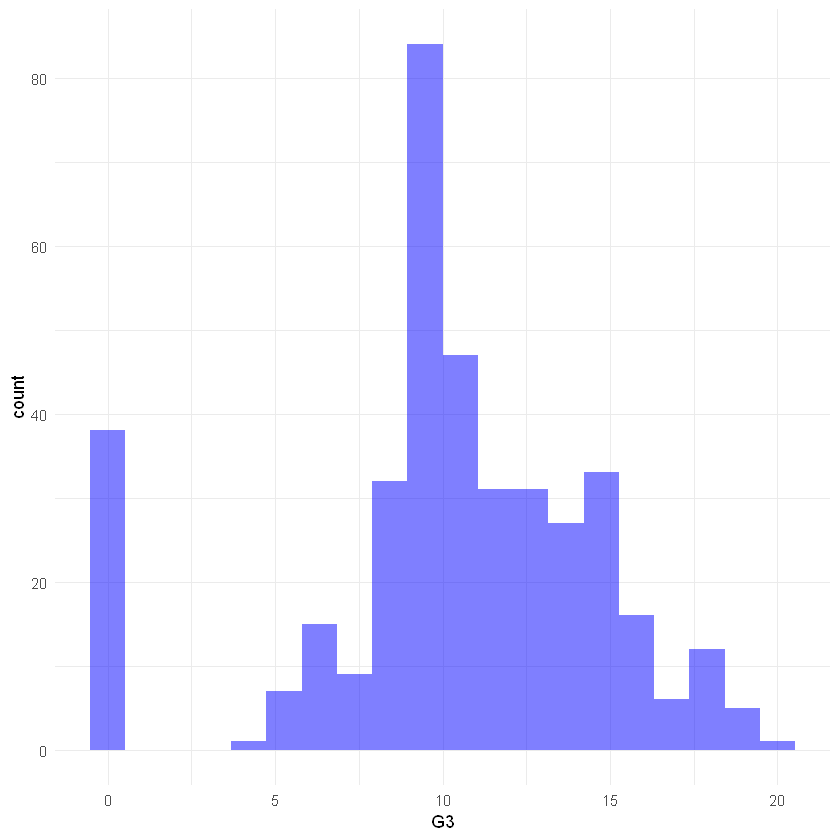

In [21]:
ggplot(student,aes(x=G3))+geom_histogram(bins=20, alpha=0.5, fill='blue')+theme_minimal()

In [22]:
#build model

#reduced model
model<-lm(y~x1+x2, student)
#entire model
model_all<-lm(~.,student)

ERROR: Error in eval(predvars, data, env): object 'y' not found


In [23]:
install.packages('caTools')
library(caTools)

set.seed(101)

Installing package into 'C:/Users/Lauren Redpath/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'caTools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caTools'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Lauren Redpath\Documents\R\win-library\3.6\00LOCK\caTools\libs\x64\caTools.dll to C:\Users\Lauren Redpath\Documents\R\win-library\3.6\caTools\libs\x64\caTools.dll: Permission denied"Warning message:
"restored 'caTools'"


The downloaded binary packages are in
	C:\Users\Lauren Redpath\AppData\Local\Temp\RtmpIBwJuQ\downloaded_packages


In [24]:
sample <- sample.split(student$G3, SplitRatio = 0.7)

In [25]:
train <- subset(student, sample =TRUE)

In [26]:
test <- subset(student, sample= FALSE)

In [27]:
head (train)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15


In [28]:
#training model for predictions

model <- lm(G3~ ., train)

In [29]:
summary (model)


Call:
lm(formula = G3 ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9339 -0.5532  0.2680  0.9689  4.6461 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.115488   2.116958  -0.527 0.598573    
schoolMS          0.480742   0.366512   1.312 0.190485    
sexM              0.174396   0.233588   0.747 0.455805    
age              -0.173302   0.100780  -1.720 0.086380 .  
addressU          0.104455   0.270791   0.386 0.699922    
famsizeLE3        0.036512   0.226680   0.161 0.872128    
PstatusT         -0.127673   0.335626  -0.380 0.703875    
Medu              0.129685   0.149999   0.865 0.387859    
Fedu             -0.133940   0.128768  -1.040 0.298974    
Mjobhealth       -0.146426   0.518491  -0.282 0.777796    
Mjobother         0.074088   0.332044   0.223 0.823565    
Mjobservices      0.046956   0.369587   0.127 0.898973    
Mjobteacher      -0.026276   0.481632  -0.055 0.956522    
Fjobhealth        0.330

In [30]:
#grab the residuals

res<-residuals(model)

In [32]:
class(res)

[1] "numeric"

In [33]:
res<-as.data.frame(res)

In [34]:
=head(res)

res
0.8592152
1.9703191
2.1082992
1.8708782
1.0337345
-1.4886707


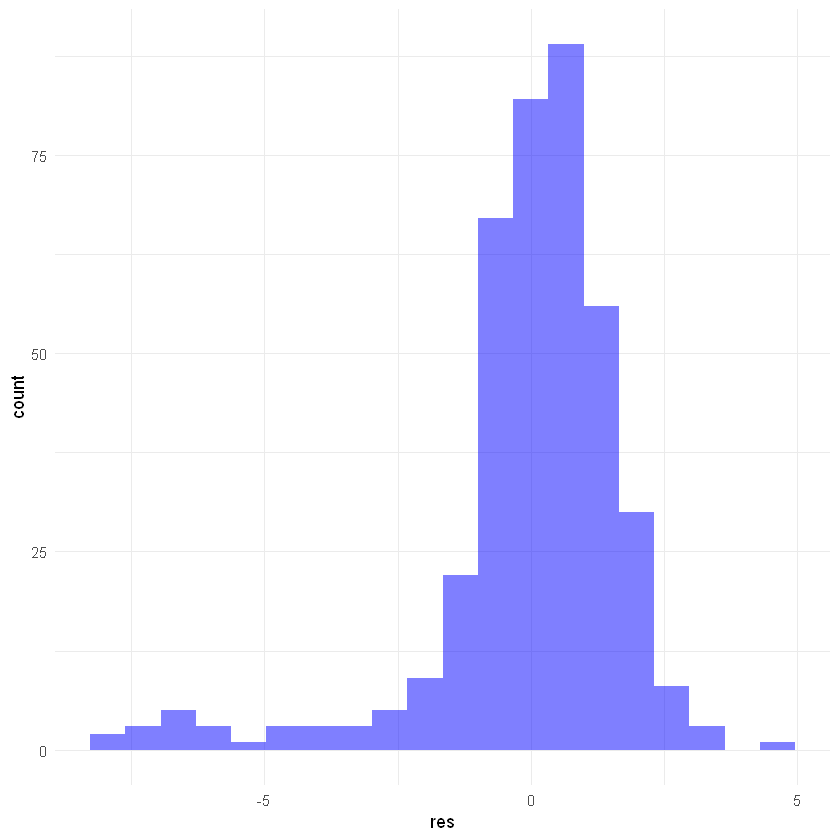

In [35]:
ggplot(res, aes(res))+geom_histogram(bins=20, alpha=0.5, fill='blue')+theme_minimal()

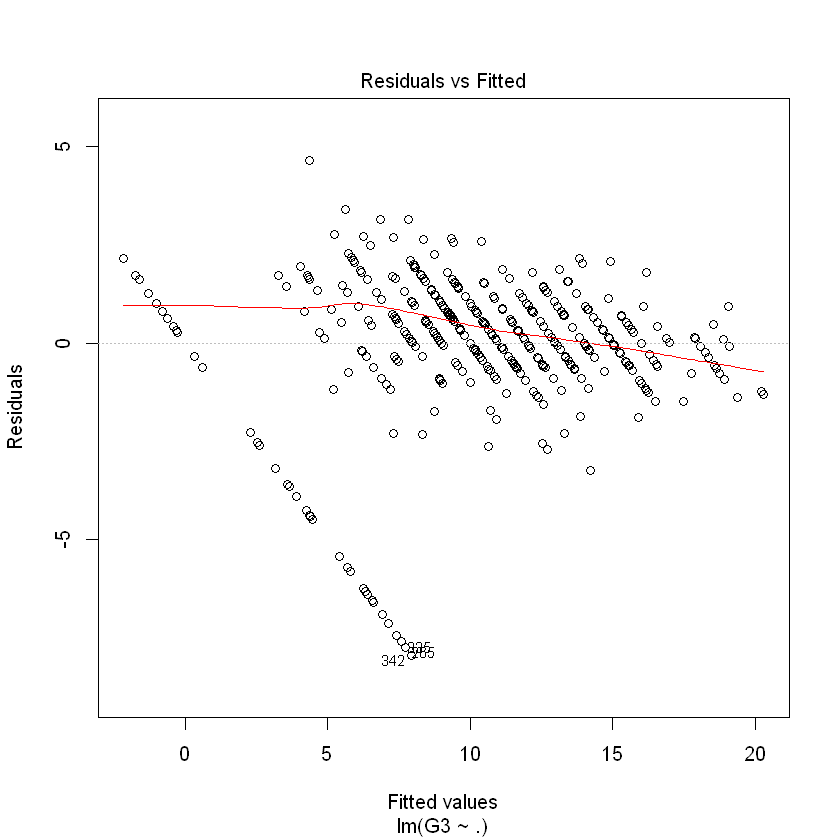

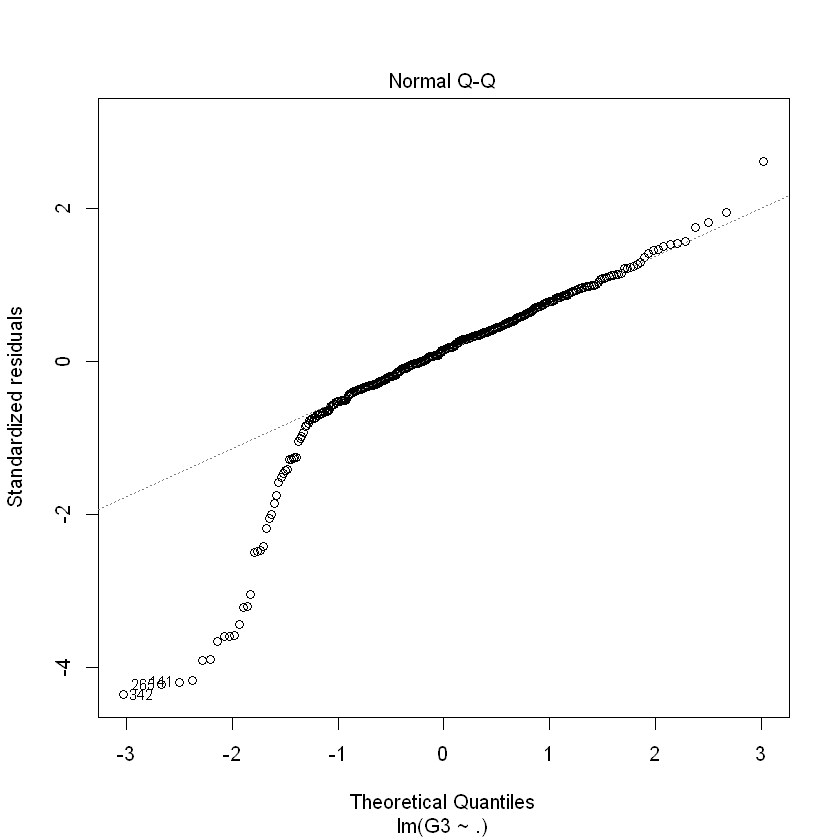

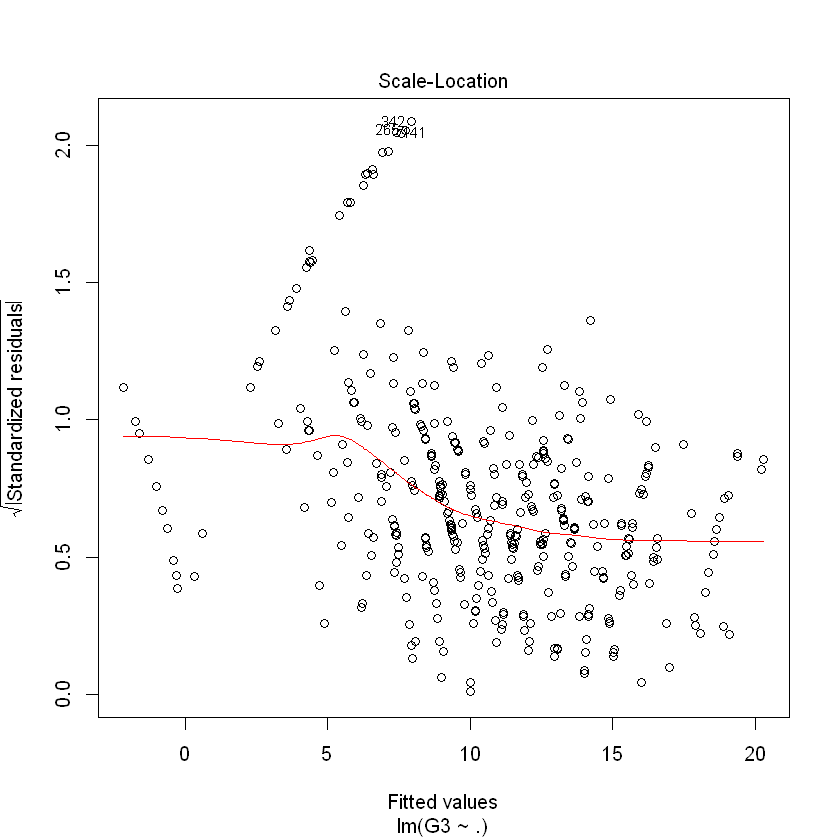

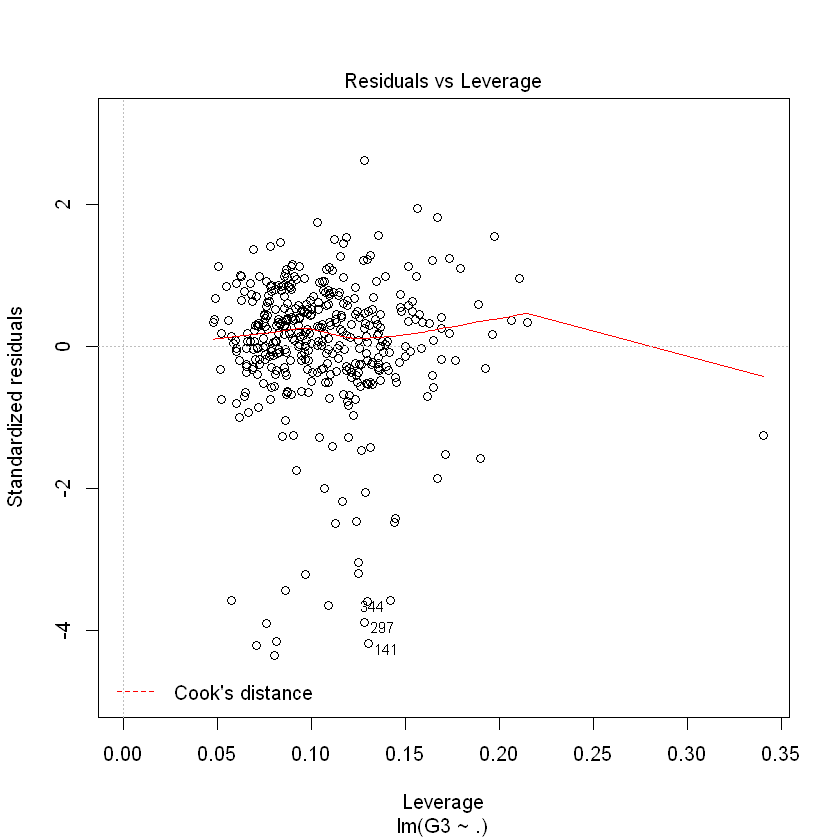

In [36]:
plot(model)

In [37]:
#predicitons

G3.predictions<-predict(model, test)

In [40]:
#determine if predicited are anywhere near actual

results<-cbind(G3.predictions, test$G3)
colnames(results) <-c('Pred', 'Actual')
results<-as.data.frame(results)
head(results)

Pred,Actual
5.140785,6
4.029681,6
7.891701,10
13.129122,15
8.966265,10
16.488671,15


In [41]:
#post hoc cleaning on 0 scores

to_zero<-function(x){
    if(x<0){
        return(0)
    }else{
        return(x)
    }
}

results$Pred <- sapply(results$Pred, to_zero)

In [42]:
#MSE and RMSE

mse<-mean((results$Actual - results$Pred)^2)
mse

[1] 3.192289

In [44]:
rmse<-mse^0.5
rmse

[1] 1.786698

In [46]:
#r-squared
SSE = sum((results$Pred - results$Actual)^2)
SST = sum((mean(student$G3)-results$Actual)^2)
R2 = 1- SSE/SST
R2

[1] 0.847525

In [49]:
#logistic regression - (survived vs died) --> equate to a binary of 1 and 0

df.train<-read.csv('titanic_train.csv')

In [48]:
install.packages('Amelia')
library(Amelia)

Installing package into 'C:/Users/Lauren Redpath/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependency 'RcppArmadillo'




  There is a binary version available but the source version is later:
       binary source needs_compilation
Amelia  1.7.5  1.7.6              TRUE

  Binaries will be installed
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'Amelia' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lauren Redpath\AppData\Local\Temp\RtmpIBwJuQ\downloaded_packages


Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2019 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


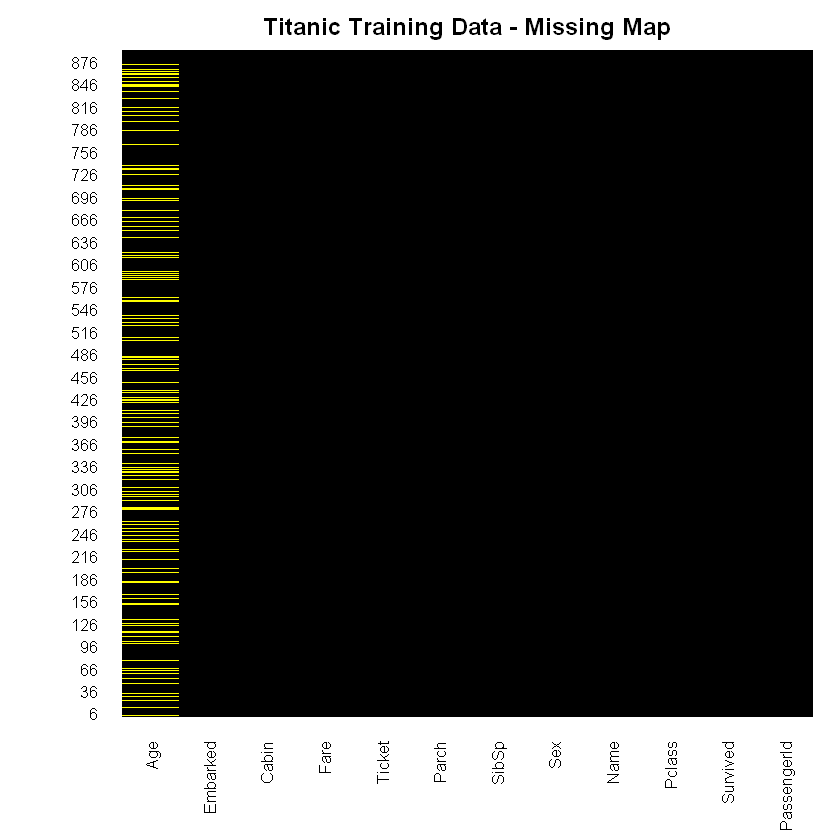

In [51]:
missmap(df.train, main='Titanic Training Data - Missing Map', col=c("yellow", "black"), legend=FALSE)

Warning message:
"Removed 177 rows containing non-finite values (stat_boxplot)."

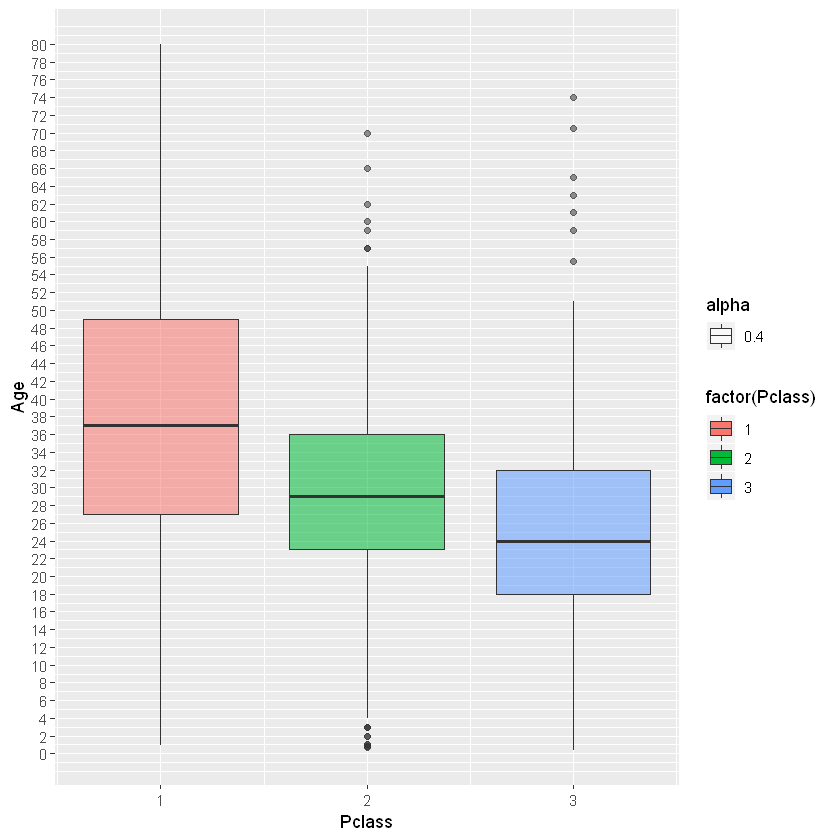

In [54]:
pl <- ggplot(df.train, aes(Pclass, Age))+geom_boxplot(aes(group=Pclass, fill=factor(Pclass), alpha=0.4))
pl+scale_y_continuous(breaks=seq(min(0),max(80),by=2))

In [55]:
impute_age <- function(age, class){
    out<-age
    for(i in 1:length(age)){
        if (is.na(age[i])){
            if (class[i]==1){
                out[i]<-37
            }else if(class[i]==2){
                out[i]<-29
            }else{
                out[i]<-24
            }
        }else{
            out[i]<-age[i]
        }
    }
    return(out)
}

In [56]:
fixed.ages<-impute_age(df.train$Age, df.train$Pclass)

In [57]:
df.train$Age <-fixed.ages

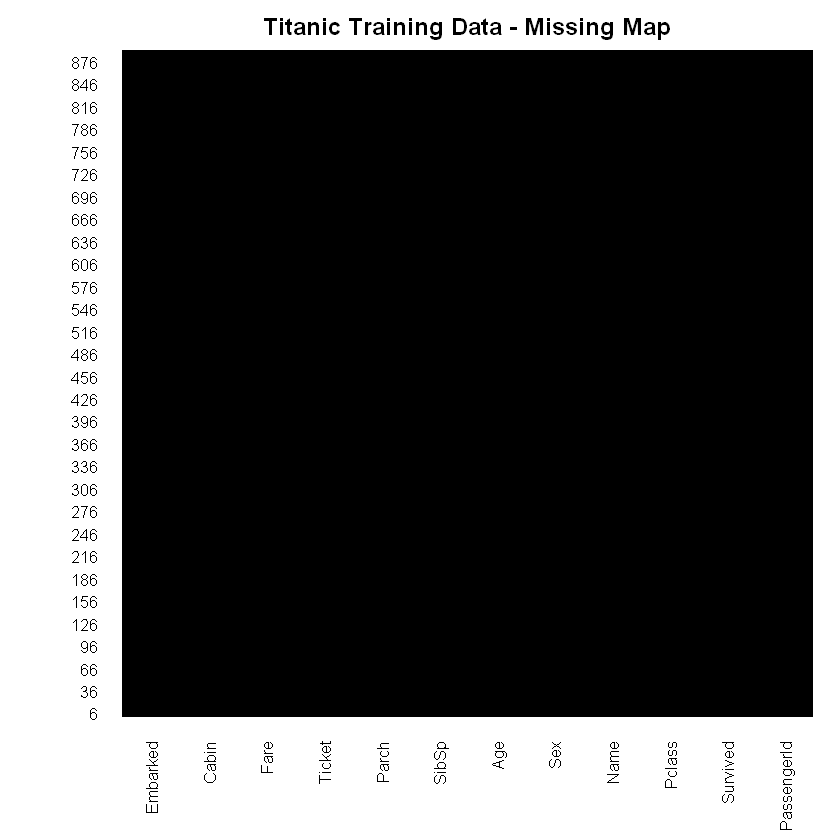

In [58]:
missmap(df.train, main='Titanic Training Data - Missing Map', col=c("yellow", "black"), legend=FALSE)

In [62]:
#build logistic regression model

df.train <- select(df.train, -PassengerId, -Name, -Ticket, -Cabin)

In [63]:
str(df.train)

'data.frame':	891 obs. of  8 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [64]:
df.train$Survived <- as.factor(df.train$Survived)
df.train$Pclass <- as.factor(df.train$Pclass)
df.train$Parch <- as.factor(df.train$Parch)
df.train$Sibsp <- as.factor(df.train$SibSp)

In [65]:
split = sample.split(df.train$Survived, SplitRatio = 0.7)

final.train = subset(df.train, split=TRUE)
final.test = subset(df.train, split=FALSE)

In [66]:
final.log.model <-glm(formula = Survived ~., family=binomial(link='logit'), data=final.train)

In [67]:
summary(final.log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = final.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8158  -0.6134  -0.4138   0.5808   2.4896  

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.845e+01  1.660e+03   0.011 0.991134    
Pclass2     -1.079e+00  3.092e-01  -3.490 0.000484 ***
Pclass3     -2.191e+00  3.161e-01  -6.930 4.20e-12 ***
Sexmale     -2.677e+00  2.040e-01 -13.123  < 2e-16 ***
Age         -3.971e-02  8.758e-03  -4.534 5.79e-06 ***
SibSp       -2.009e+00  9.472e+01  -0.021 0.983077    
Parch1       3.741e-01  2.895e-01   1.292 0.196213    
Parch2       3.862e-02  3.824e-01   0.101 0.919560    
Parch3       3.655e-01  1.056e+00   0.346 0.729318    
Parch4      -1.586e+01  1.055e+03  -0.015 0.988007    
Parch5      -1.152e+00  1.172e+00  -0.983 0.325771    
Parch6      -1.643e+01  2.400e+03  -0.007 0.994536    
Fare         2.109e-

In [68]:
fitted.probs<-predict(final.log.model, newdata=final.test, type='response')

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [69]:
fitted.probs

1            2            3            4            5            6 
1.130525e-01 9.305344e-01 5.935442e-01 9.159471e-01 6.563207e-02 1.281400e-01 
           7            8            9           10           11           12 
2.446716e-01 3.975087e-02 5.949127e-01 9.154517e-01 8.489278e-01 7.921422e-01 
          13           14           15           16           17           18 
1.130282e-01 2.111649e-02 7.016131e-01 5.880293e-01 9.103698e-02 2.149395e-01 
          19           20           21           22           23           24 
5.702039e-01 6.778216e-01 1.814959e-01 1.833300e-01 7.533010e-01 4.677172e-01 
          25           26           27           28           29           30 
3.218059e-01 2.461812e-01 1.263582e-01 1.832662e-01 6.810501e-01 9.802752e-02 
          31           32           33           34           35           36 
4.170205e-01 9.423113e-01 6.809909e-01 5.897282e-02 5.836176e-01 3.614456e-01 
          37           38           39           40           41           42 
1.263592e-01 1.091080e-01 6.053547e-01 7.739377e-01 4.768491e-01 8.262896e-01 
          43           44           45           46           47           48 
1.265145e-01 9.469381e-01 7.225498e-01 9.805627e-02 1.392766e-01 6.809909e-01 
          49           50           51           52           53           54 
1.003994e-01 6.896479e-01 5.852713e-02 1.090568e-01 8.974875e-01 8.161805e-01 
          55           56           57           58           59           60 
2.928965e-01 3.806739e-01 8.447917e-01 1.079138e-01 9.231544e-01 2.442505e-08 
          61           62           63           64           65           66 
1.353895e-01 1.000000e+00 3.493595e-01 2.698524e-02 4.462360e-01 1.882915e-01 
          67           68           69           70           71           72 
7.984529e-01 1.170943e-01 2.890081e-01 6.998901e-02 1.946927e-01 2.913117e-07 
          73           74           75           76           77           78 
2.993972e-01 1.282661e-01 8.057712e-02 9.452779e-02 9.802752e-02 9.805627e-02 
          79           80           81           82           83           84 
4.739097e-01 5.570988e-01 1.054966e-01 8.207392e-02 6.810081e-01 4.738109e-01 
          85           86           87           88           89           90 
8.644973e-01 1.068471e-01 1.979751e-01 9.805627e-02 7.357744e-01 9.805627e-02 
          91           92           93           94           95           96 
8.184388e-02 1.129868e-01 3.299117e-01 1.041395e-01 2.632649e-02 9.805627e-02 
          97           98           99          100          101          102 
1.748891e-01 6.876839e-01 8.290071e-01 2.001767e-01 5.742366e-01 9.802752e-02 
         103          104          105          106          107          108 
6.481460e-01 7.075728e-02 4.629995e-02 8.485253e-02 6.402847e-01 9.800500e-02 
         109          110          111          112          113          114 
5.867599e-02 7.056304e-01 2.996458e-01 7.716410e-01 1.053077e-01 6.686845e-01 
         115          116          117          118          119          120 
7.382689e-01 1.090824e-01 2.263305e-02 2.319756e-01 7.572962e-01 4.365088e-01 
         121          122          123          124          125          126 
2.423402e-01 9.805627e-02 2.631145e-01 7.760760e-01 3.319263e-01 2.030678e-01 
         127          128          129          130          131          132 
1.279733e-01 9.788702e-02 7.740241e-01 4.499527e-02 9.199523e-02 1.128170e-01 
         133          134          135          136          137          138 
4.109511e-01 8.161805e-01 2.429508e-01 3.174235e-01 9.490483e-01 4.089681e-01 
         139          140          141          142          143          144 
1.302351e-01 6.008160e-01 6.898269e-01 6.311381e-01 6.355521e-01 1.515412e-01 
         145          146          147          148          149          150 
2.969693e-01 4.030547e-01 8.797036e-02 7.023161e-01 1.784053e-01 1.404429e-01 
         151          152          153          154          

In [70]:
fitted.results<-ifelse(fitted.probs > 0.5, 1, 0)

In [71]:
misClass <- mean(fitted.results != final.test$Survived)

In [73]:
print(paste('Accuracy =', 1-misClass ))

[1] "Accuracy = 0.818181818181818"


In [74]:
table(final.test$Survived, fitted.probs >0.5)

   
    FALSE TRUE
  0   482   67
  1    95  247